# Insurance Claim Prediction

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

## Importing the necessary libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

Matplotlib is building the font cache; this may take a moment.


## Reading the data

In [4]:
data_2 = pd.read_csv(r'C:\Users\kanth\Desktop\PGP-DSBA\04. Data Mining\Project\Insu_data.csv')

In [5]:
data_2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


## Checking the correctness of the data

In [6]:
data_2.shape

(3000, 10)

In [7]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


# Checking the null values

In [8]:
print('Number of Null values:')
data_2.isnull().sum()


Number of Null values:


Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

## 5 Point summary of the data

In [9]:
data_2.describe(include="all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


## Unique values of Categorical variables

In [10]:
for column in data_2[[ 'Agency_Code', 'Type', 'Claimed',  'Channel', 
                    'Product Name', 'Destination',]]:
    print(column.upper(),': ',data_2[column].nunique())
    print(data_2[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




## Checking the duplicated values

In [11]:
dups = data_2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data_2[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


## Dropping the duplicate values

In [12]:
data_2.drop_duplicates(inplace=True) 

In [18]:
dups = data_2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print('Shape of the data after removing duplicate data :', data_2.shape)

Number of duplicate rows = 0
Shape of the data after removing duplicate data : (2861, 10)


## Relation between Continuous variables

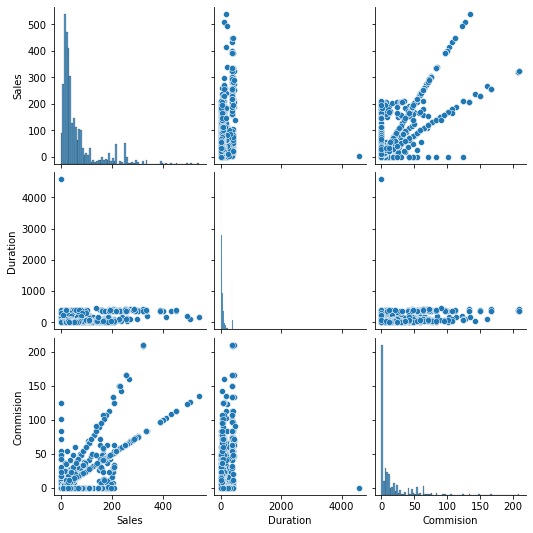

In [21]:
sns.pairplot(data_2[['Sales', 'Duration', 'Commision']])

<AxesSubplot:>

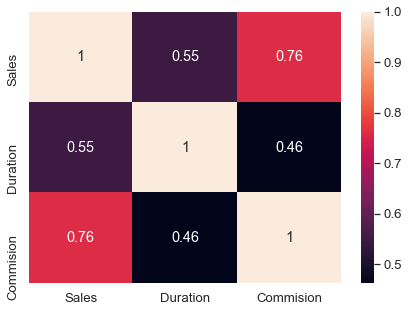

In [22]:
plt.figure(figsize=(7,5))
sns.set(font_scale=1.2)
sns.heatmap(data_2[['Sales', 'Duration', 'Commision']].corr(), annot=True)

## One hot encoding of Categorical variables

In [23]:
for feature in data_2.columns: 
    if data_2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data_2[feature].unique()))
        print(pd.Categorical(data_2[feature].unique()).codes)
        data_2[feature] = pd.Categorical(data_2[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


# Checking for class imbalance

In [24]:
data_2.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

In [25]:
X = data_2.drop('Claimed', axis=1)

y = data_2.pop('Claimed')

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


## Splitting the data into Training and Testing data

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [27]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


## Decision Tree Classifier

In [28]:
dt_model= DecisionTreeClassifier(criterion = 'gini')

In [29]:
dt_model.fit(X_train,train_labels)

DecisionTreeClassifier()

## Generating Decision Tree

In [32]:
train_char_label = ['No', 'Yes']
Claim_Tree_File = open('C:\Anaconda\Claim_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Claim_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Claim_Tree_File.close()

## Parameter Tuning and Cross Validation

In [33]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20],
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [200,300],
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 10)

In [34]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 300}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=300)

In [35]:
train_char_label = ['no', 'yes']
Claim_reg = open('C:\Anaconda\Claim_reg.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= Claim_reg , feature_names = list(X_train), class_names = list(train_char_label))

Claim_reg.close()
dot_data

## Important Features

In [36]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.600450
Sales         0.304966
Product Name  0.047357
Duration      0.018764
Commision     0.014732
Age           0.013731
Type          0.000000
Channel       0.000000
Destination   0.000000


## Predictions and Performance of model

In [37]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [38]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.573171,0.426829
1,0.971223,0.028777
2,0.232975,0.767025
3,0.837500,0.162500
4,0.837500,0.162500


AUC: 0.810


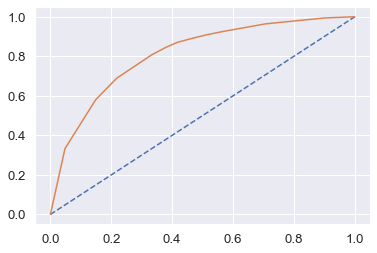

In [39]:
probs = best_grid.predict_proba(X_train)

probs = probs[:, 1]

cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)

cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.792


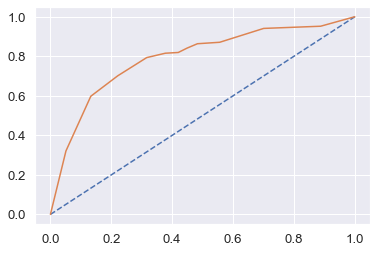

In [40]:
probs = best_grid.predict_proba(X_test)

probs = probs[:, 1]

cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)

cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(cart_test_fpr, cart_test_tpr)

## Scores of Training data

In [41]:
confusion_matrix(train_labels, ytrain_predict)

array([[1157,  202],
       [ 270,  373]], dtype=int64)

In [42]:
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7642357642357642

In [43]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1359
           1       0.65      0.58      0.61       643

    accuracy                           0.76      2002
   macro avg       0.73      0.72      0.72      2002
weighted avg       0.76      0.76      0.76      2002



In [44]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][1],2)
cart_train_recall=round(df.loc["1"][2],2)
cart_train_f1=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.58
cart_train_recall  0.61
cart_train_f1  0.65


## Scores of Testing data

In [45]:
confusion_matrix(test_labels, ytest_predict)

array([[510,  78],
       [109, 162]], dtype=int64)

In [46]:
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7823050058207218

In [47]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.60      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



In [48]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][1],2)
cart_test_recall=round(df.loc["1"][2],2)
cart_test_f1=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_test_precision)
print ('cart_train_recall ',cart_test_recall)
print ('cart_train_f1 ',cart_test_f1)

cart_train_precision  0.6
cart_train_recall  0.63
cart_train_f1  0.68


## Random Forest Model

In [49]:
param_grid = {
    'max_depth': [10],
    'max_features': [6,7],
    'min_samples_leaf': [10,20],
    'min_samples_split': [25,30],
    'n_estimators': [400,450]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [50]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10], 'max_features': [6, 7],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [25, 30],
                         'n_estimators': [400, 450]})

In [51]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 25,
 'n_estimators': 400}

In [52]:
best_grid = grid_search.best_estimator_

In [53]:
best_grid

RandomForestClassifier(max_depth=10, max_features=7, min_samples_leaf=10,
                       min_samples_split=25, n_estimators=400)

## Predictions and Performance

In [54]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Scores of Train data

In [55]:
confusion_matrix(train_labels,ytrain_predict)

array([[1234,  125],
       [ 242,  401]], dtype=int64)

In [56]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8166833166833167

In [57]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1359
           1       0.76      0.62      0.69       643

    accuracy                           0.82      2002
   macro avg       0.80      0.77      0.78      2002
weighted avg       0.81      0.82      0.81      2002



In [58]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][1],2)
rf_train_recall=round(df.loc["1"][2],2)
rf_train_f1=round(df.loc["1"][0],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.62
rf_train_recall  0.69
rf_train_f1  0.76


Area under Curve is 0.7658298973378331


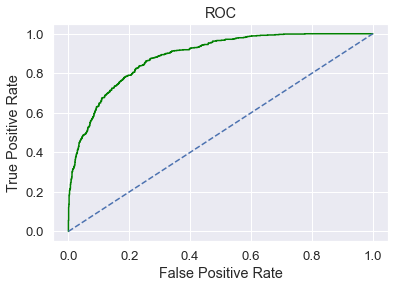

In [59]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

## Scores of Test data

In [60]:
confusion_matrix(test_labels,ytest_predict)

array([[517,  71],
       [118, 153]], dtype=int64)

In [61]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.779976717112922

In [62]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       588
           1       0.68      0.56      0.62       271

    accuracy                           0.78       859
   macro avg       0.75      0.72      0.73       859
weighted avg       0.77      0.78      0.77       859



In [63]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][1],2)
rf_test_recall=round(df.loc["1"][2],2)
rf_test_f1=round(df.loc["1"][0],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.56
rf_test_recall  0.62
rf_test_f1  0.68


Area under Curve is 0.7219136732183649


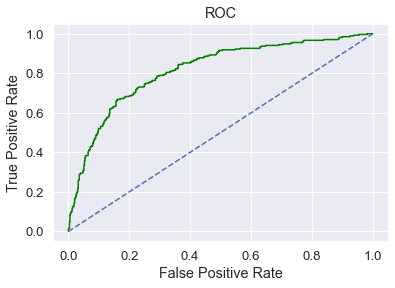

In [66]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

## Important Features

In [65]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.313907
Sales         0.227317
Product Name  0.134019
Duration      0.128088
Age           0.090169
Commision     0.087078
Destination   0.014477
Type          0.003645
Channel       0.001300


## Building a Neural Network Classifier

In [67]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [68]:
X_trains

array([[ 2.88764239, -1.2626112 , -1.19813318, ..., -0.65375471,
        -1.31338076, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.37032806,
         0.24339146, -0.44775345],
       [ 2.04101412, -0.27289013,  0.83463176, ...,  0.11574864,
         0.24339146,  1.24676906],
       ...,
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.68209737,
        -0.53499465, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146,  1.24676906]])

In [69]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
}

anncl = MLPClassifier()

grid_search = GridSearchCV(estimator = anncl, param_grid = param_grid, cv = 5)

In [70]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100, 100)],
                         'solver': ['sgd', 'adam'], 'tol': [0.1, 0.01]})

In [71]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100, 100),
 'solver': 'adam',
 'tol': 0.01}

In [72]:
best_grid = grid_search.best_estimator_

## Predictions and Performance

In [73]:
ytrain_predict = best_grid.predict(X_trains)
ytest_predict = best_grid.predict(X_tests)

## Scores of Train Data

In [74]:
confusion_matrix(train_labels,ytrain_predict)

array([[1199,  160],
       [ 323,  320]], dtype=int64)

In [75]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1359
           1       0.67      0.50      0.57       643

    accuracy                           0.76      2002
   macro avg       0.73      0.69      0.70      2002
weighted avg       0.75      0.76      0.75      2002



In [78]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][1],2)
nn_train_recall=round(df.loc["1"][2],2)
nn_train_f1=round(df.loc["1"][0],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.5
nn_train_recall  0.57
nn_train_f1  0.67


In [79]:
nn_train_acc=best_grid.score(X_trains,train_labels) 
nn_train_acc

0.7587412587412588

Area under Curve is 0.689966778701291


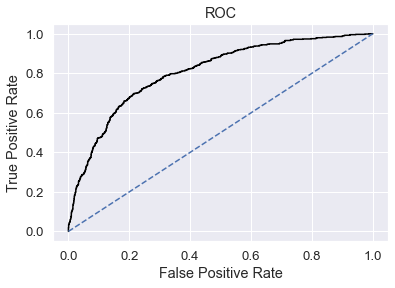

In [82]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_trains)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict(X_trains))
print('Area under Curve is', nn_train_auc)

## Scores of Test Data

In [76]:
confusion_matrix(test_labels,ytest_predict)

array([[524,  64],
       [136, 135]], dtype=int64)

In [77]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       588
           1       0.68      0.50      0.57       271

    accuracy                           0.77       859
   macro avg       0.74      0.69      0.71       859
weighted avg       0.76      0.77      0.76       859



In [81]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][1],2)
nn_test_recall=round(df.loc["1"][2],2)
nn_test_f1=round(df.loc["1"][0],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.5
nn_test_recall  0.57
nn_test_f1  0.68


In [80]:
nn_test_acc=best_grid.score(X_tests,test_labels)
nn_test_acc

0.7671711292200233

In [83]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][1],2)
nn_test_recall=round(df.loc["1"][2],2)
nn_test_f1=round(df.loc["1"][0],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.5
nn_test_recall  0.57
nn_test_f1  0.68


Area under Curve is 0.6946557220674249


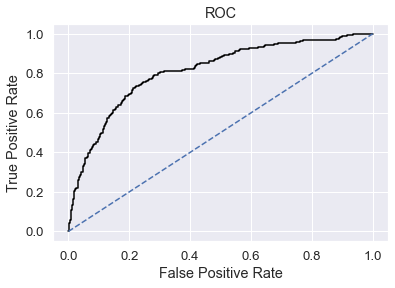

In [84]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_tests)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict(X_tests))
print('Area under Curve is', nn_test_auc)

## Comparison of the performance metrics from the 3 models

In [85]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.76,0.78,0.82,0.78,0.76,0.77
AUC,0.81,0.79,0.77,0.72,0.69,0.69
Recall,0.61,0.63,0.69,0.62,0.57,0.57
Precision,0.58,0.60,0.62,0.56,0.50,0.50
F1 Score,0.65,0.68,0.76,0.68,0.67,0.68


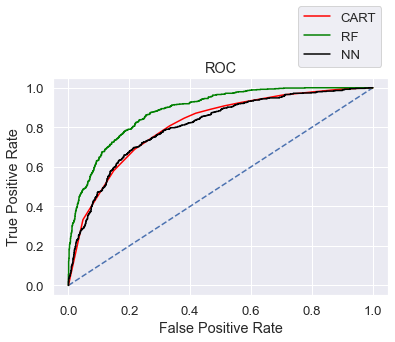

In [86]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

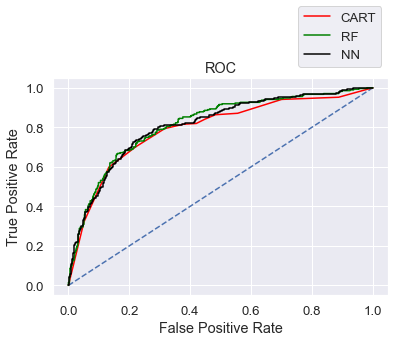

In [87]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#### CART Conclusion:
Training and Testing set results are almost similar and with overall measures this model performed very well when compared with Random Trees model.
#### Random Forest Conclusion:
Training and Testing set results vary slightly higher when compared with the other two models. So it is can be said that this model is slightly over fitted.
#### Neural Network Conclusion:
Neural network model’s overall performance is not as good as other two models. However, the training and testing set results are very similar. Based on the whole performance CART is the best model amongst all the models.

## Inferences

1. Agency code and Sales are the two important features in both the CART and Random Forest Models.

2. Also, the attributes like Type and Destination doesn’t have much of importance, Hence PCA can also be performed. Reduction in the dimensions further reduces the complexity of the models.

3. It is observed that higher claim frequencies are happening at the agency code C2B, with the product Silver Plan and through Online Channel.

4.  Higher Claim frequency through the trips booked through online travel insurance agencies could be because of increased Online travel bookings.

5. The insurance company has to further analyze the severities of the claims at the mentioned agency, product and channel and take a decision to reduce the risks.